
## **Exploring the Predictive Power of School Quality for Pavement Maintenance**


### Team: Mary Oelkers, Andrea Hayman, Yunkai Yao, and Zimin Zhu 
---

### **Introduction**

Our project focuses on the ideas of seeing whether pavement quality of an area can predict school quality. This relationship would be important when it comes to funding and prioritizing education spending. We are trying to use answers from school survey data to predict pavement quality in the surrounding area (roughly 1 mile). Although a broad connection between education and infrastructure is expected, no one has attempted to combine these particular forms of infrastructure and education data and use one to predict the other. If we are able to show education quality predicts pavement quality, parents can use this as an argument to improve their school's education and roads, because it will not only benefit their children, but the whole community.

### **Literature Review**
To determine how our project topic is done today and what are the limits of current practice, we conducted a literature review on Google Scholar. When we set the keywords as “road quality” and “school quality”, there were 22,000 results recorded ranging from 2004 to 2024. Ordered by relevance, we found that there are few articles setting school quality and road quality as the main topic. Although some papers directly discuss road quality or school quality, most studies explore quality-related issues within their respective fields.

After reviewing many articles, we found that China’s School Mapping Restructure (SMR) program mentioned a certain relationship between students' transportation choices and the improvement of school quality. However, it still did not directly address whether there is a correlation between road quality and school quality (Zhao & Barakat, 2015). Similarly, in the book *Evaluating the Quality of Learning: The SOLO Taxonomy (Structure of the Observed Learning Outcome)*, the authors do not discuss road quality directly. However, their main point—that methods like the SOLO taxonomy can be used to assess learning quality—could offer insights for evaluating the quality of roads around schools (Biggs & Collis, 2014). They suggest that school quality may be related to the overall quality of its surrounding environment, and road quality is a crucial component of that environment.

For the goal of predicting road quality, the vast majority of articles explore how to forecast road conditions from a technological perspective. For example, they use smartphone sensors and apply methods like MTS (Multi-Task Learning) to predict whether road maintenance is needed (Wang et al., 2018). Wang et al. (2016) use stereo vision and 3D reconstruction techniques to assess road surface quality. And Zhang et al. (2018) employ convolutional neural networks for road damage detection and assessment.

### References

- Biggs, J. B., & Collis, K. F. (2014). *Evaluating the quality of learning: The SOLO taxonomy (Structure of the Observed Learning Outcome)*. Academic Press.
- Wang, H., Huo, N., Li, J., Wang, K., & Wang, Z. (2018). A road quality detection method based on the Mahalanobis-Taguchi system. *IEEE Access, 6*, 29078-29087. https://doi.org/10.1109/ACCESS.2018.2839765
- Wang, W., Yan, N., Zhang, Y., Zhang, F., Zha, H., & Feng, X. (2016). Road Surface 3D Reconstruction Based on Dense Subpixel Disparity Map Estimation. *IEEE Transactions on Intelligent Transportation Systems, 17*(10), 2739-2749. https://doi.org/10.1109/TITS.2016.2521822
- Zhang, L., Yang, F., Zhang, Y. D., & Zhu, Y. J. (2018). Road crack detection using deep convolutional neural network. In *2016 IEEE International Conference on Image Processing (ICIP)* (pp. 3708-3712). IEEE. https://doi.org/10.1109/ICIP.2016.7533052
- Zhao, D., & Barakat, B. (2015). The increasingly long road to school in rural China: The impacts of education network consolidation on broadly defined schooling distance in Xinfeng County of rural China. *Asia Pacific Education Review, 16*(3), 413-431. https://doi.org/10.1007/s12564-015-9380-y

### **Data and Methods**

#### Data

We sourced our features from the [NYC School Survey Archives](https://infohub.nyced.org/reports/students-and-schools/school-quality/nyc-school-survey/survey-archives), our target variable from NYC OpenData’s [Historical Street Pavement Rating dataset](https://data.cityofnewyork.us/Transportation/Street-Pavement-Rating-Historical-/2cav-chmn), and a third dataset from NYC OpenData ([2019-2020 School Locations](https://data.cityofnewyork.us/Education/2019-2020-School-Locations/wg9x-4ke6/about_data)) to relate the two datasets. Our data is sourced directly from the City of New York, so we have faith in its reliability.

When observing the data we organized based on most frequently answered questions and most valuable questions. We labelled them as Q1-Q18. These questions are:
- 1.⁠ ⁠School staff regularly communicate with me about how I can help my child learn.
- 2.⁠ ⁠Teachers work closely with me to meet my child's needs.
- 3.⁠ ⁠I feel respected by my child's teachers.
- 4.⁠ ⁠Staff at this school work hard to build trusting relationships with parents/guardians like me.
- 5.⁠ ⁠My child's school communicates with me in a language that I can understand.
- 6.⁠ ⁠I feel respected by my child's principal/school leader.
- 7.⁠ ⁠I trust the principal/school leader at his or her word (to do what he or she says that he or she will do).
- 8.⁠ ⁠The principal/school leader is an effective manager who makes the school run smoothly.
- 9.⁠ ⁠My child’s teachers think of me as a partner in educating my child.
- 10.⁠ ⁠The principal/school leader at this school works hard to build trusting relationships with parents/guardians like me.
- 11.⁠ ⁠My child's school will make me aware if there are any concerns about my child’s social or emotional well-being.
- 12.⁠ ⁠The principal/school leader at this school works to create a sense of community in the school.
- 13.⁠ ⁠The principal/school leader at this school promotes family and community involvement in the school.
- 14.⁠ ⁠At this school my child is safe.
- 15.⁠ ⁠How satisfied are you with the following? The response I get when I contact this school.
- 16.⁠ ⁠How satisfied are you with the following? The education my child has received this year.
- 17.⁠ ⁠How satisfied are you with the following? The overall quality of my child's teachers this year.
- 18.⁠ ⁠During the school year, have you...attended a general school meeting.

After doing an EDA, we ran through some of the main factors. When looking at the statistical summary the 'average_rating' which is the rating of the pavement is 7.356696 and most of the questions means are between 50% to 99% which means most of the questions show that the people are statisfied by the schools around them. Most of the question variables have a lot of outliers but this might be important to our data based on the pavement information. A lot of the distributions are skewed to the right besides Q18 there is definitely some variation in the distribution and the answers. Based on the correlation matrix there seemed to be a lot of relationship between the different questions but little relationship between the 'average_rating' and the questions being asked in our survey. The distribution of 'average_rating' is showing a normal distribution compared to the other variables. Then we dropped some NAs and looked at the distribution of year and there seems to be a lot more data in the more recent years. We took out 2020 because a lot of the survey was not taken because most schools were online anyways.


In [ ]:
import pandas as pd 
df = pd.read_csv("/workspaces/Beans-MLCode/working spaces/final_df.csv")
df = pd.DataFrame(df)
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
columns_to_convert = [f'Q{i}' for i in range(1, 19)] 
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.str.rstrip('%').astype(float) / 100)
print(df)

      average_rating  year     DBN                              School Name  \
0           6.833333  2017  15K001                      P.S. 001 The Bergen   
1           8.000000  2017  17K002             Parkside Preparatory Academy   
2           6.000000  2017  13K003             P.S. 003 The Bedford Village   
3           6.800000  2017  75K004                                P.S. K004   
4           7.000000  2017  17K006              Norma Adams Clemons Academy   
...              ...   ...     ...                                      ...   
5998        7.547170  2022  84X730        Bronx Charter School for the Arts   
5999        6.992000  2022  75X754  J. M. Rapport School Career Development   
6000        6.992000  2022  75X754  J. M. Rapport School Career Development   
6001        7.601504  2022  75X811                                P.S. X811   
6002        7.601504  2022  75X811                                P.S. X811   

     Total Parent Response Rate    Q1    Q2    Q3  

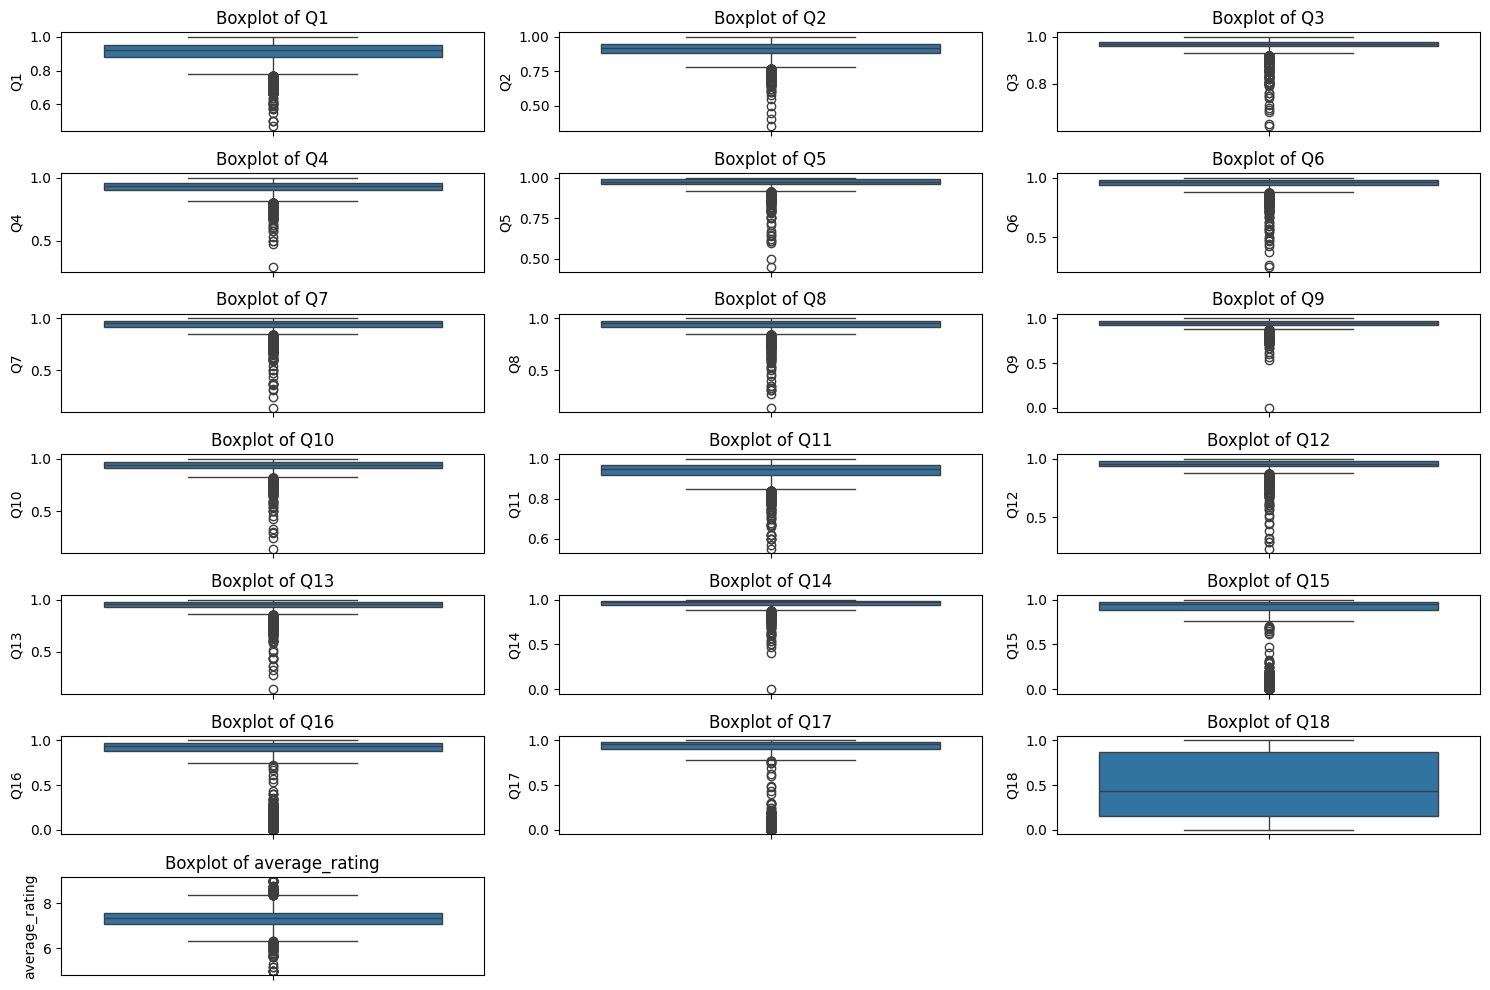

In [9]:
# Checking for Outliers
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = [f'Q{i}' for i in range(1, 19)] + ['average_rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot((len(columns_to_plot) // 3) + 1, 3, i) 
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

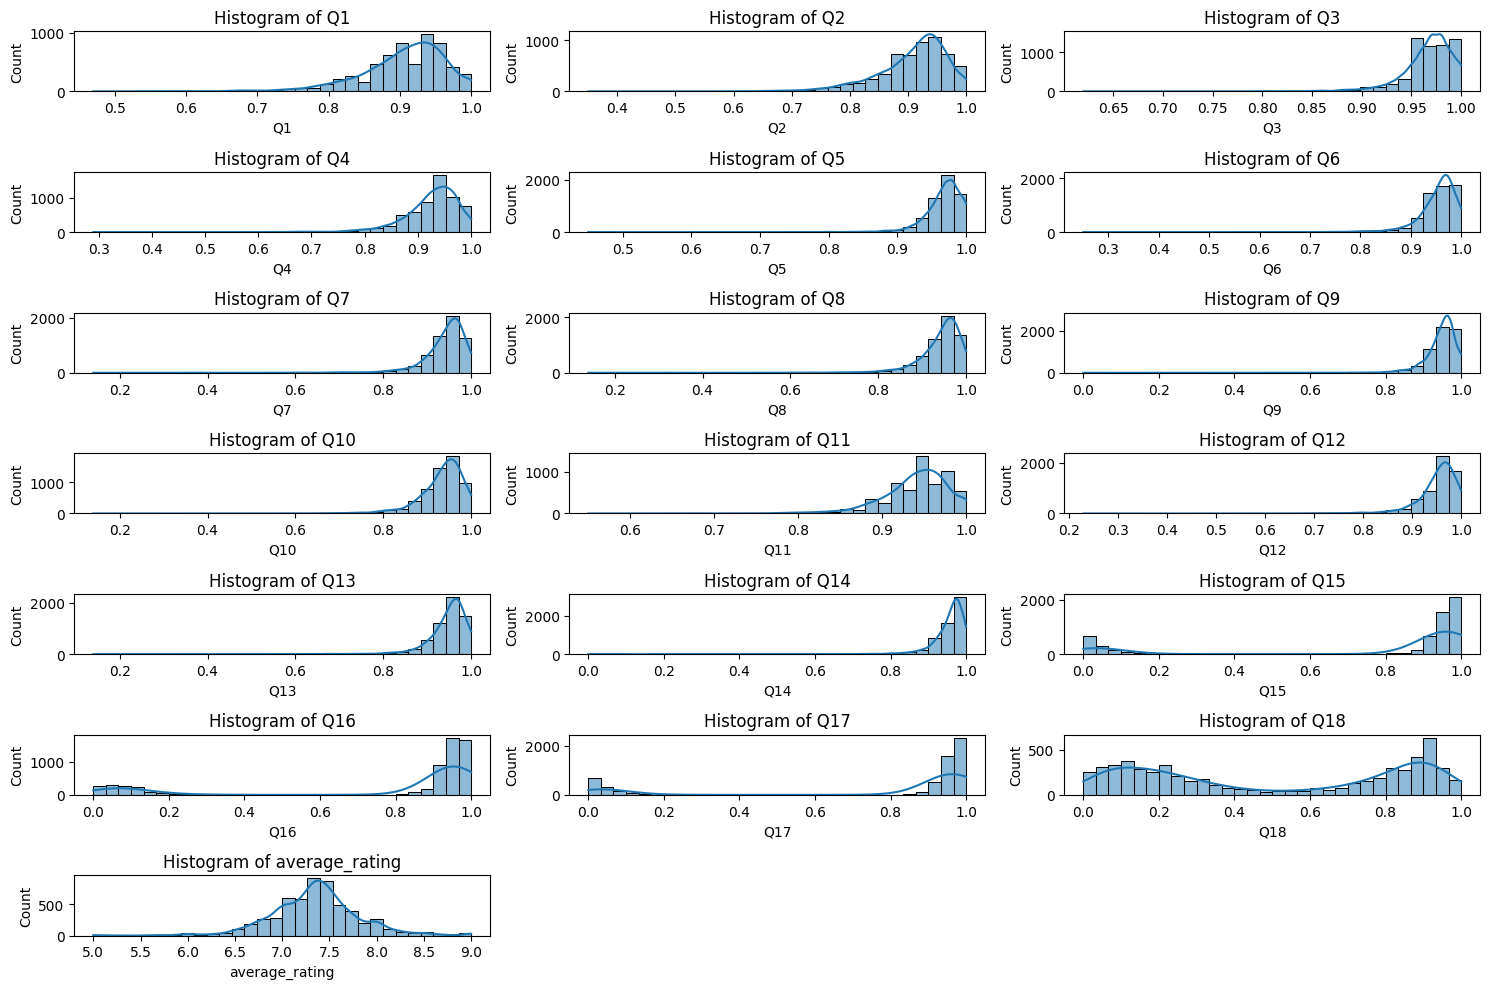

In [10]:
# Looking at the Distribution
columns_to_plot = [f'Q{i}' for i in range(1, 19)] + ['average_rating']

plt.figure(figsize=(15, 10))

num_columns = len(columns_to_plot)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)  

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 3, i) 
    sns.histplot(data=df, x=col, bins=30, kde=True) 
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

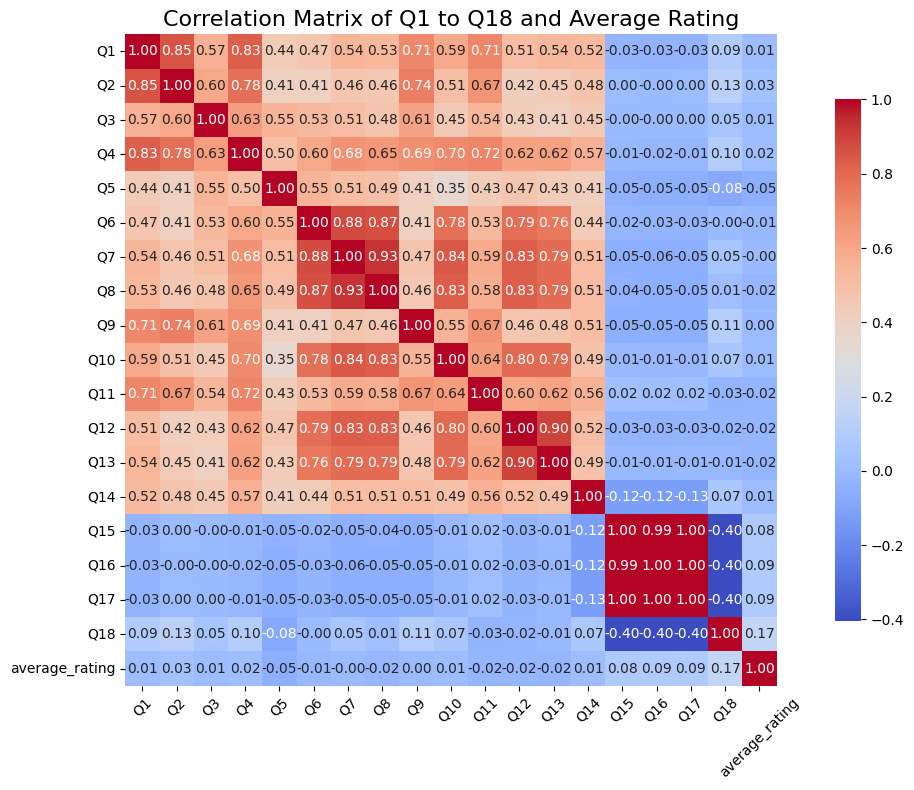

In [11]:
columns_to_analyze = [f'Q{i}' for i in range(1, 19)] + ['average_rating'] 

correlation_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix of Q1 to Q18 and Average Rating', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 

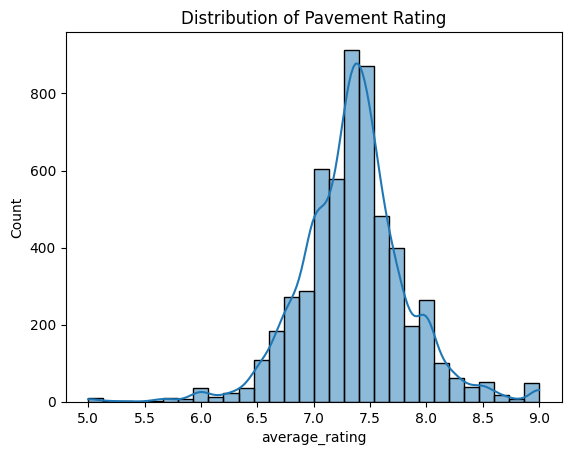

In [12]:
# Looking at Average Pavement Ratings
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Pavement Rating')
plt.show()import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['year']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) // 3) + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

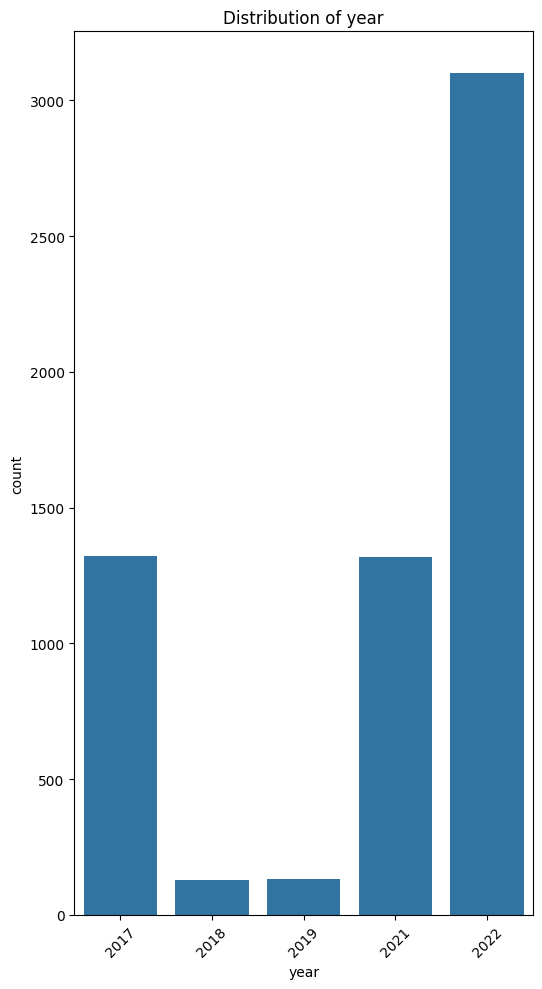

In [13]:
categorical_columns = ['year']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) // 3) + 1, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Methods

- **Cleaning and Merging of Pavement & School Location is found in mergecode.ipynb**

- **Cleaning and Merging of Survey is found in surveycode.ipynb**

- **Merging Data all together in final.csv is found in mergecode.ipynb**

- **Model Selection and tuning is found in modelcode.ipynb**

Since our ideal final dataset does not exist, we needed to do a lot of preprocessing to combine our separate data. We used geopandas to combine the pavement data and school location data into geometric objects and merge based on latitude and longitude and find the average rating, as seen below. This was run separately on each year of the pavement data.

The survey data was a little more complicated because it was broken up by year. We are focused on every year from 2017 to 2023 other than 2020 because this would mess with our data due to schools being online that year. First all the data was brought into the survey.csv and merged together. After the pavement and school location data was merged together we were able to merge the survey data through 'location_name' and 'location_code.' This changed the data and made it so that way everything was merged correctly. 

Then we did some cleaning of the data by going through and seeing what questions were most important to our analysis and which had the most frequently answered questions which we limited it to what was mentioned in the 'data' section. We also got rid of repeating columns and some extra columns that we did not need for our analysis. This helped a lot with the modeling data and when looking closer into the EDA.

Since our data is annual, we wanted models that would work well with a time element. We explored adding lagged columns and rolling averages to our features, to incorporate the time element while still using more generalized models. We ran basic models with our original data, lagged data, and rolling averages, using k-fold cross evaluation to evaluate, and found adding lagged columns gave us our best perfomance. For our general models, we tested RandomForest, XGBoost, and SVR. We also experimented with LSTM, a time-specific neural network. For our models with better performance, we proceeded with hyperparameter tuning.

### **Results**

Based on the models that were performed we focused on the MSE and R^2 scores to see if pavement quality and school quality have a relationship. MSE measures the average squared difference between the predicted and actual values. R^2 score measures the proportion of variance in the target variable that the model explains. Below is a table showing our results from the analysis.

| **Data**          | **MAE**          | **R^2**          |
|---------------|--------------|--------------|
| Original Data | 0.3834       | -0.5902      |
| Lag Data      | 0.3721       | -0.5092      |
| Rolling Data  | really large | really large |

We first ran our analysis on the original data, lag data, and rolling data to see our outcomes. Then we went onto do other machine learning techniques. The original data has 0.3834 as a MAE which suggests moderate performance but when looking at the R^2 score this is showing a negative output, meaning that the model is underperforming. The lag data showed a negative R^2 which is still showing the model is not working. The last was a rolling data which was very large which is showing instability in the model. Since these outcomes were unsuccessful we decided to run more models to see which one is our best outcome to the project.


| **Model**       | **MAE**   | **R^2** |
|------------------|-----------|--------------|
| Random Forest    | 0.0668    | 0.0878       |
| XGBoost          | 0.4096    | -0.7692      |
| SVR              | 0.3686    | -0.4272      |
| LSTM             | 0.3130    | -0.0003      |

Random forest achieved the highest R^2 score with 0.0878 which is low. This is the only positive score suggesting that the relationship between school quality metrics and pavement quality have a very weak relationship. LSTM performed the qorse with the R^2 score close to zero (-0.0003), meaning it was barely better than random guessing. SVR and XGBoost have negative R^2 scores indicating these models failed to capture any meaningful relationship.

The results suggest that while there is a slight predictive relationship using the Random Forest, overall, the models struggled to leverage school quality metrics to predict pavement quality. This outcome aligns with the weak correlation observed during the EDA, where school quality metrics did not exhibit strong associations with pavement ratings. 

Since these outcomes were pretty disappointing we tried to shift our original hypothesis. This was extremely difficult to do since we tailored our dataset to our the current hypothesis. We tried to reorganize our dataset with looking at other data like graduation rates and traffic accidents. We tried merging with the original longitude and latitude found from the school location data as well as merging that to the survey data. Our group spent days trying to just merge this data so we moved onto another hypothesis which was school graduation rates. We compared graduation rates to our original dataset but it was showing issues with overfitting after hyperparameter tuning and cross validation. Traffic accidents was also tried to compare to the school quality data and there were a lot of issues with merging. This was very late in the game that we really did not have a lot of time to perfect a different hypothesis. 


### **Discussion**

The goal of our project was to see if education quality had any predictive quality over pavement quality. Ultimately, we found that with our data, that predictive quality was not present. While this may not be a win for our stakeholders, we did still answer the question we set at the beginning of this project. Additionally, as discussed in the literature review, this topic has not really been explored by the machine learning community and this project can hopefully spark interest and encourage others (maybe even our own stakeholders) to explore this question with different metrics and data.

### **Limitations**

NYC Education Data is formatted more for general viewing, rather than machine learning -- data is only available in multi-tab workbooks, not entirely consistent from year to year, and required a lot of manual cleaning. This prevented us from using the full breadth of data available to us, and had time permitted we would have liked to include more years of data and additional metrics of education quality such as test scores, graduation rates, and attendance rates.

### **Future Work**

For our future work, we plan to compare pavement quality with various other datasets related to community factors, such as demographic information, traffic patterns, and local infrastructure. By analyzing these datasets together, we hope to uncover deeper insights into how community characteristics influence pavement conditions. Unfortunately, due to time constraints, we were unable to explore these additional datasets in this phase of the project. However, we aim to integrate these sources in future analyses to better understand the broader context of pavement quality. Below are the links to the datasets we intend to explore further:

- https://infohub.nyced.org/reports/students-and-schools/school-quality/information-and-data-overview
- https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data
- https://data.cityofnewyork.us/widgets/k397-673e?mobile_redirect=true
- https://www.schools.nyc.gov/about-us/funding/funding-our-schools